In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [56]:
caloric_loss=pd.read_csv('caloric_loss.csv')
dietary_energy=pd.read_csv('dietary_energy.csv')
food_prod_var=pd.read_csv('foodproduction_variability.csv')
food_sup_var=pd.read_csv('foodsupply_variability.csv')
gdp_ppp=pd.read_csv('gdp_ppp.csv')
ader=pd.read_csv('ader.csv')
mder=pd.read_csv('mder.csv')
pop_total=pd.read_csv('population_total.csv')
under1=pd.read_csv('undernourishment.csv')
under2=pd.read_csv('undernourishment_2.csv')

In [57]:
caloric_loss=caloric_loss.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

In [58]:
dietary_energy=dietary_energy.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

food_prod_var=food_prod_var.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

food_sup_var=food_sup_var.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

gdp_ppp=gdp_ppp.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

ader=ader.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

mder=mder.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

pop_total=pop_total.set_index('(table of contents)').T[['India','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})





In [59]:
caloric_loss=caloric_loss.astype(float)
caloric_loss['Year']= pd.to_datetime(caloric_loss['Year'], format="%Y")

In [60]:
food_prod_var=food_prod_var.astype(float)
food_prod_var['Year']= pd.to_datetime(food_prod_var['Year'], format="%Y")

In [61]:
food_sup_var=food_sup_var.astype(float)
food_sup_var['Year']= pd.to_datetime(food_sup_var['Year'], format="%Y")

In [62]:
gdp_ppp=gdp_ppp.astype(float)
gdp_ppp['Year']= pd.to_datetime(gdp_ppp['Year'], format="%Y")

In [63]:
ader=ader.astype(float)
ader['Year']= pd.to_datetime(ader['Year'], format="%Y")

In [64]:
mder=mder.astype(float)
mder['Year']= pd.to_datetime(mder['Year'], format="%Y")

In [65]:
pop_total=pop_total.astype(float)
pop_total['Year']= pd.to_datetime(pop_total['Year'], format="%Y")

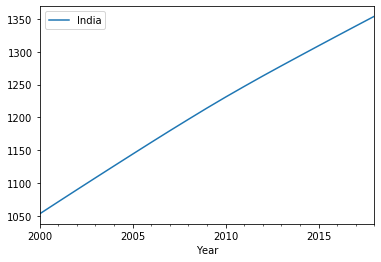

In [66]:
pop_total.plot(y='India',x='Year')

In [67]:
ader

(table of contents),India,Year
A_9 - Average Dietary Energy Requirement (ADER),2204.0,2000-01-01
Unnamed: 4,2211.0,2001-01-01
Unnamed: 5,2219.0,2002-01-01
Unnamed: 6,2227.0,2003-01-01
Unnamed: 7,2235.0,2004-01-01
Unnamed: 8,2243.0,2005-01-01
Unnamed: 9,2250.0,2006-01-01
Unnamed: 10,2254.0,2007-01-01
Unnamed: 11,2258.0,2008-01-01
Unnamed: 12,2263.0,2009-01-01


In [68]:
df1=pd.DataFrame()
df1['caloric_loss']=caloric_loss['India']

In [69]:
df100=pd.DataFrame()

In [70]:
x=caloric_loss['India'].values

In [71]:
df100['caloric_loss']=x

In [72]:
x=food_prod_var['India'].values
df100['food_prod_var']=pd.Series(x)

In [73]:
x=food_sup_var['India'].values
df100['food_sup_var']=pd.Series(x)

In [74]:
x=gdp_ppp['India'].values
df100['gdp_ppp']=pd.Series(x)

In [75]:
x=ader['India'].values
df100['ader']=pd.Series(x)

In [76]:
x=mder['India'].values
df100['mder']=pd.Series(x)

In [77]:
x=pop_total['India'].values
df100['pop_total']=pd.Series(x)

In [78]:
df100

,caloric_loss,food_prod_var,food_sup_var,gdp_ppp,ader,mder,pop_total
0,2.48,1.4,27.0,2710.3,2204.0,1721.0,1053.1
1,2.48,1.9,20.0,2792.3,2211.0,1726.0,1071.5
2,2.44,1.9,23.0,2850.0,2219.0,1731.0,1089.8
3,2.44,7.3,43.0,3023.6,2227.0,1736.0,1108.0
4,2.50,7.2,52.0,3210.9,2235.0,1742.0,1126.1
5,2.51,6.5,49.0,3411.0,2243.0,1747.0,1144.1
6,2.54,5.9,30.0,3629.4,2250.0,1752.0,1162.0
7,2.56,4.6,25.0,3848.9,2254.0,1755.0,1179.7
8,2.63,5.9,49.0,3910.1,2258.0,1758.0,1197.1
9,2.61,6.9,60.0,4158.4,2263.0,1761.0,1214.3


In [79]:
under1=under1.set_index('(table of contents)').T[['Southern Asia','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})
under2=under2.set_index('(table of contents)').T[['Southern Asia','Regions.Subregions.Countries']].iloc[3:22].rename(columns={'Regions.Subregions.Countries':'Year'})

In [80]:
under1=under1.astype(float)
under1['Year']= pd.to_datetime(under1['Year'], format="%Y")

In [81]:
under2=under2.astype(float)
under2['Year']= pd.to_datetime(under2['Year'], format="%Y")

In [82]:
x=under1['Southern Asia'].values
df100['under_perc']=pd.Series(x)

In [83]:
x=under2['Southern Asia'].values
df100['under_num']=pd.Series(x)

In [84]:
dietary_energy['Year']=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

In [85]:
x=dietary_energy['India'].values
df100['dietary_energy']=pd.Series(x)

In [86]:
df100

,caloric_loss,food_prod_var,food_sup_var,gdp_ppp,ader,mder,pop_total,under_perc,under_num,dietary_energy
0,2.48,1.4,27.0,2710.3,2204.0,1721.0,1053.1,18.2,264.5,2346
1,2.48,1.9,20.0,2792.3,2211.0,1726.0,1071.5,19.8,292.3,2306
2,2.44,1.9,23.0,2850.0,2219.0,1731.0,1089.8,20.9,315.0,2272
3,2.44,7.3,43.0,3023.6,2227.0,1736.0,1108.0,21.8,333.7,2245
4,2.50,7.2,52.0,3210.9,2235.0,1742.0,1126.1,21.9,341.7,2238
5,2.51,6.5,49.0,3411.0,2243.0,1747.0,1144.1,21.5,339.8,2253
6,2.54,5.9,30.0,3629.4,2250.0,1752.0,1162.0,19.9,320.5,2298
7,2.56,4.6,25.0,3848.9,2254.0,1755.0,1179.7,18.4,299.6,2346
8,2.63,5.9,49.0,3910.1,2258.0,1758.0,1197.1,17.6,291.0,2369
9,2.61,6.9,60.0,4158.4,2263.0,1761.0,1214.3,17.3,290.5,2380


In [87]:
x=under1['Year'].values
df100['Year']=pd.Series(x)

In [88]:
df100

,caloric_loss,food_prod_var,food_sup_var,gdp_ppp,ader,mder,pop_total,under_perc,under_num,dietary_energy,Year
0,2.48,1.4,27.0,2710.3,2204.0,1721.0,1053.1,18.2,264.5,2346,2000-01-01
1,2.48,1.9,20.0,2792.3,2211.0,1726.0,1071.5,19.8,292.3,2306,2001-01-01
2,2.44,1.9,23.0,2850.0,2219.0,1731.0,1089.8,20.9,315.0,2272,2002-01-01
3,2.44,7.3,43.0,3023.6,2227.0,1736.0,1108.0,21.8,333.7,2245,2003-01-01
4,2.50,7.2,52.0,3210.9,2235.0,1742.0,1126.1,21.9,341.7,2238,2004-01-01
5,2.51,6.5,49.0,3411.0,2243.0,1747.0,1144.1,21.5,339.8,2253,2005-01-01
6,2.54,5.9,30.0,3629.4,2250.0,1752.0,1162.0,19.9,320.5,2298,2006-01-01
7,2.56,4.6,25.0,3848.9,2254.0,1755.0,1179.7,18.4,299.6,2346,2007-01-01
8,2.63,5.9,49.0,3910.1,2258.0,1758.0,1197.1,17.6,291.0,2369,2008-01-01
9,2.61,6.9,60.0,4158.4,2263.0,1761.0,1214.3,17.3,290.5,2380,2009-01-01


In [90]:
cols=df100.columns

In [94]:
cols=cols.drop('Year')

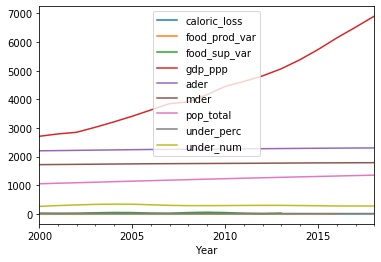